In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-05-28 to 2019-07-12 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

114


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
QQQ,28,0.338754,0.394826,0.837882,9.278200,4.152357
ONEQ,28,0.319371,0.358710,0.868208,8.540499,3.758269
FTC,28,0.313039,0.351248,0.868624,8.998106,2.299020
MGK,28,0.309665,0.352342,0.856353,8.588386,3.512876
JKE,28,0.308841,0.344187,0.874248,8.375256,3.511357
IWY,28,0.307610,0.348529,0.859822,8.506516,3.272679
VUG,28,0.306580,0.339934,0.878532,8.646720,3.091531
SCHG,28,0.306215,0.318133,0.937589,8.709717,2.877697
VONG,28,0.305466,0.340152,0.874697,8.635297,2.872116


{'RWL': 0.273, 'TIP': 0.406, 'VLUE': 0.321} 0.193


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,28.0,0.194018,0.150939,-0.035365,0.071533,0.215680,0.283303,0.588673,1.232825,5.872773,1.053999
VLUE,28.0,0.303449,0.254950,-0.060572,0.112065,0.294033,0.392755,0.953425,1.159099,8.786332,2.786458
RWL,28.0,0.289363,0.259742,-0.103583,0.109119,0.242710,0.375558,0.961577,1.083485,8.420626,2.280769
TIP,28.0,0.041198,0.113354,-0.148372,-0.052845,0.027808,0.135694,0.257419,0.293432,1.855984,0.929385


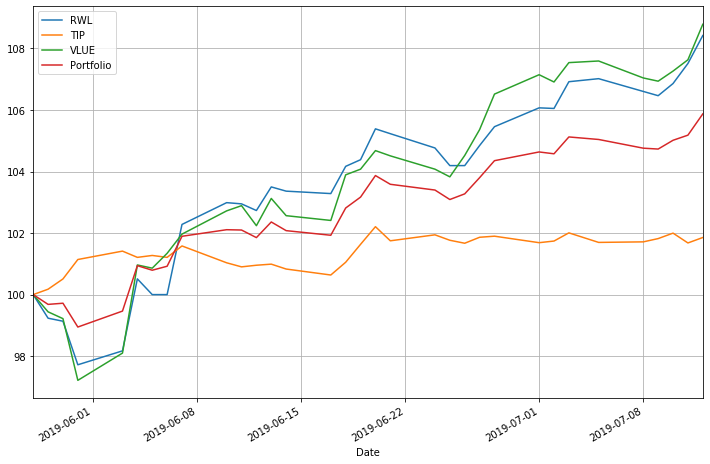

In [4]:
quote.setup_mask(['RWL', 'TIP', 'VLUE'])
ratio, mean, *_ = quote.find_optimal_ratio()
print(ratio, mean)
quote.graph(ratio)

evicted VGIT 0.683 -0.331
evicted VMBS 0.856 -0.061
evicted RDIV 0.899 0.114
evicted CET 0.871 -0.025
evicted SPLV 0.835 0.163
evicted TLT 0.578 -0.062
evicted TILT 0.463 0.027
evicted DVY 0.769 0.374
evicted RWL 0.801 -0.073
retry backlogs ['SDY', 'SPTM', 'LRGF', 'MBB', 'RPG', 'NOBL', 'ONEQ', 'ITOT', 'FTCS', 'FEX', 'SCHB', 'PRF', 'IVW', 'DGRW', 'SCHD', 'VOOG', 'SPHD', 'HDV', 'SPYD', 'DHS', 'FVD', 'SPLG', 'IWB', 'VONV', 'JHML', 'FPX', 'QUAL', 'SPHQ', 'DGRO', 'IUSG', 'IEF', 'JKD', 'SUSA', 'MTUM', 'SCHG', 'GSLC', 'FTC', 'IYY', 'CFO', 'SCHX', 'XLG', 'VTV', 'SCHK', 'IUSV', 'MOAT', 'QDF', 'VUG', 'SPYG', 'IVE', 'TDTT', 'IVV', 'VOOV', 'PWV', 'VYM', 'EDV', 'VGLT', 'VOO', 'SDOG', 'IWD', 'TLH', 'SCHV', 'VV', 'JKE', 'VTIP', 'IPE', 'RSP', 'FNDX', 'SPYV', 'SCHO', 'SHY', 'RPV', 'VIG', 'SPTS', 'IWF', 'SCHR', 'STIP', 'GOVT', 'MGV', 'IEI', 'IWV', 'SPTL', 'VONE', 'MGC', 'TIP', 'VTI', 'OEF', 'DLN', 'IWY', 'SPY', 'DIA', 'VONG', 'DSI', 'USMV', 'FTA', 'FDL', 'PKW', 'FV', 'DTN', 'MGK', 'ADX', 'USA', 'QQQ'] a

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,28.0,0.194018,0.150939,-0.035365,0.071533,0.215680,0.283303,0.588673,1.232825,5.872773,1.053999
VLUE,28.0,0.303449,0.254950,-0.060572,0.112065,0.294033,0.392755,0.953425,1.159099,8.786332,2.786458
RWL,28.0,0.289363,0.259742,-0.103583,0.109119,0.242710,0.375558,0.961577,1.083485,8.420626,2.280769
TIP,28.0,0.041198,0.113354,-0.148372,-0.052845,0.027808,0.135694,0.257419,0.293432,1.855984,0.929385


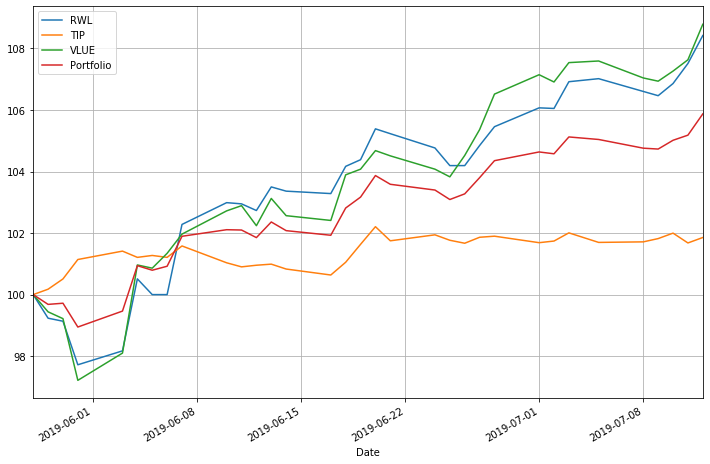

In [5]:
bounds = .15, .23
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(bounds=bounds)
quote.setup_mask(['RWL', 'TIP', 'VLUE'])
sd.update(quote.optimize_portfolio(bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['EDV', 'MTUM'])
ratio, mean, *_ = quote.find_optimal_ratio(_lambda=-1)
print(ratio, mean)
quote.graph(ratio)